# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [140]:
import pandas as pd
import numpy as np

In [141]:
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
display(df.head(5))
display(list(df.columns))
        
#df = df.dropna()
#df = df.dropna(axis=1) 
        
#(df.duplicated()== True).sum()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [142]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'st': 'state','customer':'customer_id','number_of_open_complaints':'nb_complaints'})

df.columns

Index(['customer_id', 'state', 'gender', 'education',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'nb_complaints', 'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [143]:

for cols in df.columns:
    if df[cols].nunique()<20:
        display(df[cols].unique())
df.columns

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

array(['Personal Auto', 'Corporate Auto', 'Special Auto', nan],
      dtype=object)

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car', nan], dtype=object)

Index(['customer_id', 'state', 'gender', 'education',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'nb_complaints', 'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')

In [144]:
gender_std = {'F':'F','M':'M','Femal':'F','Male':'M','female':'F'}
df['gender'] = df['gender'].replace(gender_std)
df['gender'].unique()

array([nan, 'F', 'M'], dtype=object)

In [145]:
df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [146]:
state_std = {'Washington': 'WA','Arizona': 'AZ','Nevada': 'NV',
             'California': 'CA','Oregon': 'OR','Cali': 'CA','AZ': 'AZ','WA': 'WA'}

df['state'] = df['state'].replace(state_std)
df['state'].unique()

array(['WA', 'AZ', 'NV', 'CA', 'OR', nan], dtype=object)

In [147]:
edu_std = {'Bachelors':'Bachelor'}
df['education'] = df['education'].replace(edu_std)
df['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [148]:
df['customer_lifetime_value'] = df['customer_lifetime_value'].str.replace('%','') ##ask why do we use str.replace
df['customer_lifetime_value'].unique()

array([nan, '697953.59', '1288743.17', ..., '2031499.76', '323912.47',
       '899704.02'], dtype=object)

In [149]:
veh_std = { 'Luxury SUV': 'Luxury','Sports Car': 'Luxury','Luxury Car': 'Luxury'}
df['vehicle_class'] = df['vehicle_class'].replace(veh_std)
df['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

In [150]:
#df['gender'] = df['gender'].replace({'F':'F','M':'M','Femal':'F','Male':'M','female':'F'})
#df['gender'].unique()

In [151]:
#df['gender'].unique()
#gender_std = {'F':'F','M':'M','Femal':'F','Male':'M','female':'F'}

#def replace_by_dict(column,dict):
#    return column.replace(dict)
    

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [152]:
df.dtypes

customer_id                 object
state                       object
gender                      object
education                   object
customer_lifetime_value     object
income                     float64
monthly_premium_auto       float64
nb_complaints               object
policy_type                 object
vehicle_class               object
total_claim_amount         float64
dtype: object

In [153]:
df['nb_complaints'] = df['nb_complaints'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else x)
df['nb_complaints'].unique()

# isintance(object,type) => if the object is that type TRUE else SKIP


array(['0', '2', '1', '3', '5', '4', nan], dtype=object)

In [154]:
df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value'], errors = 'coerce')
display(df.dtypes)

customer_id                 object
state                       object
gender                      object
education                   object
customer_lifetime_value    float64
income                     float64
monthly_premium_auto       float64
nb_complaints               object
policy_type                 object
vehicle_class               object
total_claim_amount         float64
dtype: object

In [155]:
df['customer_lifetime_value']

0              NaN
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
4003           NaN
4004           NaN
4005           NaN
4006           NaN
4007           NaN
Name: customer_lifetime_value, Length: 4008, dtype: float64

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [156]:
df = df.dropna()
df = df.dropna(axis=1)
df = df.reset_index(drop=True)

display(df)

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,nb_complaints,policy_type,vehicle_class,total_claim_amount
0,QZ44356,AZ,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
1,AI49188,NV,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
2,WW63253,CA,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
3,GA49547,WA,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
4,OC83172,OR,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
947,TM65736,OR,M,Master,305955.03,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
948,VJ51327,CA,F,High School or Below,2031499.76,63209.0,102.0,2,Personal Auto,SUV,207.320041
949,GS98873,AZ,F,Bachelor,323912.47,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
950,CW49887,CA,F,Master,462680.11,79487.0,114.0,0,Special Auto,SUV,547.200000


In [157]:
cat = [cols for cols in df.columns if df[cols].dtype == 'object']
num = [cols for cols in df.columns if df[cols].dtype in ['float64','int64']]

df[cat] = df[cat].fillna(df[cat].mode().iloc[0])
df[num] = df[num].fillna(df[num].median())

In [158]:
df = df.fillna(method='ffill') #found this online
df = df.fillna(method='bfill')

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [159]:
(df.duplicated()==True).sum()

0

In [160]:
df=df.drop_duplicates().reset_index(drop=True)
df

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,nb_complaints,policy_type,vehicle_class,total_claim_amount
0,QZ44356,AZ,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
1,AI49188,NV,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
2,WW63253,CA,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
3,GA49547,WA,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
4,OC83172,OR,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
947,TM65736,OR,M,Master,305955.03,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
948,VJ51327,CA,F,High School or Below,2031499.76,63209.0,102.0,2,Personal Auto,SUV,207.320041
949,GS98873,AZ,F,Bachelor,323912.47,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
950,CW49887,CA,F,Master,462680.11,79487.0,114.0,0,Special Auto,SUV,547.200000


# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [161]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

# Lab | Customer Analysis Round 3

Get the data
For this lab, we will continue using the csv file that was downloaded in the previous lab as well as the Jupyter Notebook.
There is NO NEED to fork and clone this repository.

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the Gender breakdown.
- Show a plot of Income by State.
- Show a plot of the Policy Type by the Total Claim Amount.
- Show a plot of the Education by Vehicle Class.
- What insights can you establish from these plots?
- What other plots do you feel would be beneficial?

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              952 non-null    object 
 1   state                    952 non-null    object 
 2   gender                   952 non-null    object 
 3   education                952 non-null    object 
 4   customer_lifetime_value  952 non-null    float64
 5   income                   952 non-null    float64
 6   monthly_premium_auto     952 non-null    float64
 7   nb_complaints            952 non-null    object 
 8   policy_type              952 non-null    object 
 9   vehicle_class            952 non-null    object 
 10  total_claim_amount       952 non-null    float64
dtypes: float64(4), object(7)
memory usage: 81.9+ KB


In [163]:
df.describe(include='object').T

,count,unique,top,freq
customer_id,952,952,QZ44356,1
state,952,5,CA,293
gender,952,2,F,501
education,952,5,Bachelor,291
nb_complaints,952,6,0,746
policy_type,952,3,Personal Auto,689
vehicle_class,952,4,Four-Door Car,506


In [164]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,952.0,794201.286303,625879.161398,200435.070000,411783.580000,588574.53,903750.915,4.479547e+06
income,952.0,39557.350840,30744.561851,0.000000,13087.750000,36632.00,65085.500,9.996000e+04
monthly_premium_auto,952.0,205.231092,1697.752504,61.000000,68.000000,83.00,110.000,3.535400e+04
total_claim_amount,952.0,404.999156,299.238726,0.382107,196.724587,350.40,534.000,2.893240e+03


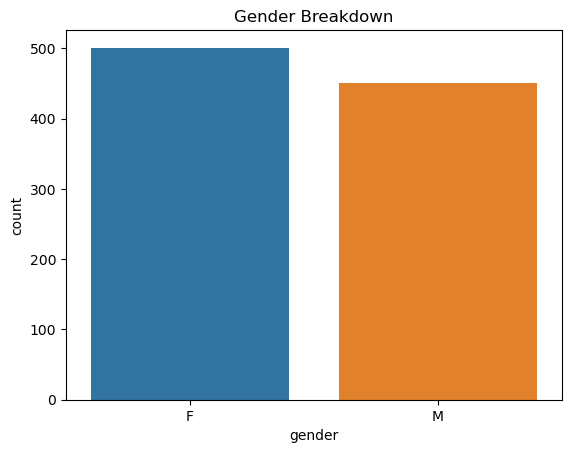

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.countplot(x='gender', data=df)
plt.title('Gender Breakdown')
plt.show()



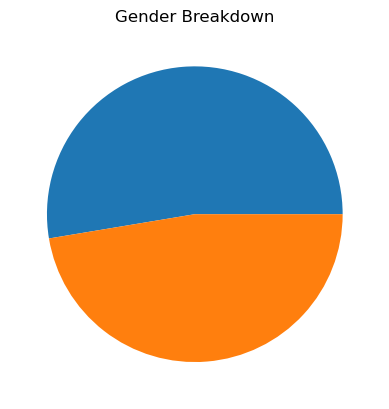

In [166]:
plt.pie(df['gender'].value_counts())
plt.title('Gender Breakdown')
plt.show()

Text(0.5, 1.0, 'Income by State')

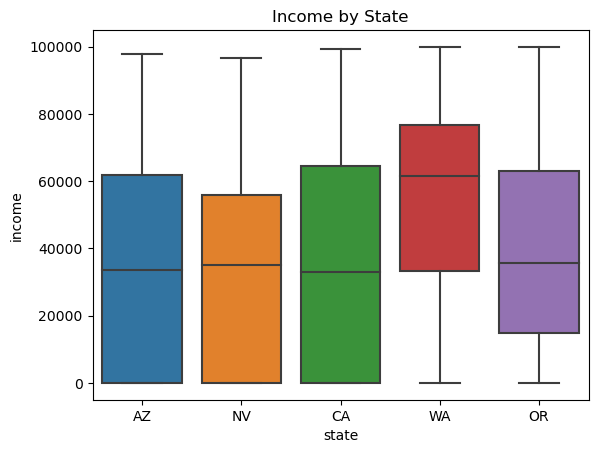

In [167]:
sns.boxplot(x='state', y='income', data=df)
plt.title('Income by State')

In [ ]:
#sns.barplot(x='state', y='income', data=df) TRY THIS

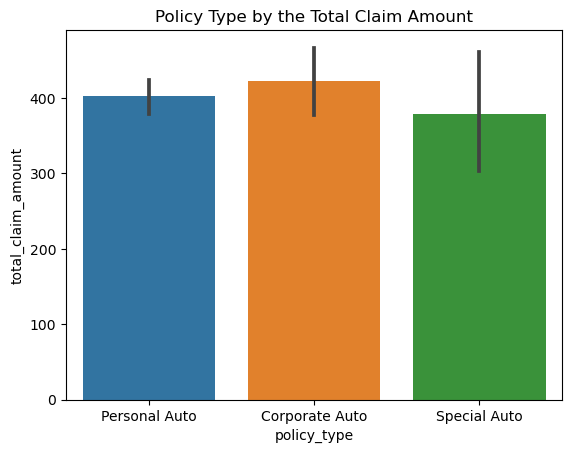

In [168]:
sns.barplot(x='policy_type', y='total_claim_amount', data=df) #learn to remove the stdv
plt.title('Policy Type by the Total Claim Amount')
plt.show()

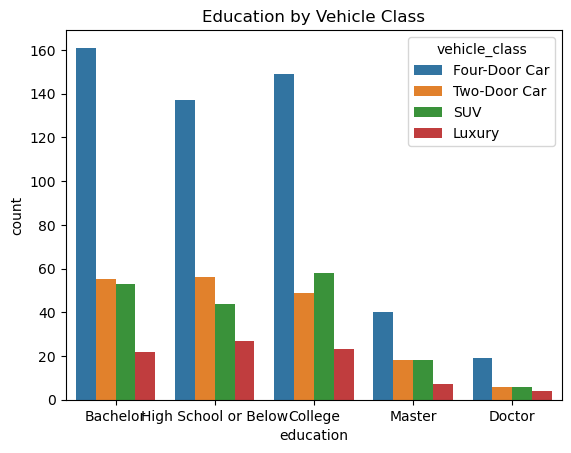

In [169]:
sns.countplot(x='education', hue='vehicle_class', data=df) #learnt this from bakr
plt.title('Education by Vehicle Class')
plt.show()

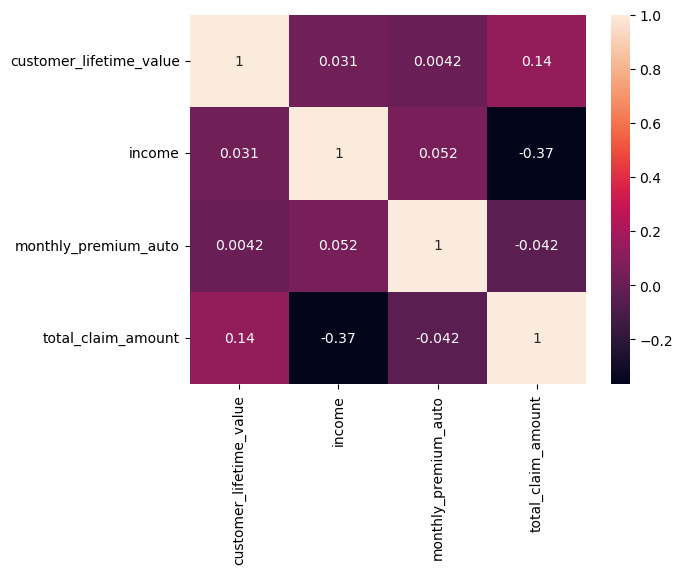

In [170]:
correlations_matrix = df.select_dtypes('number').corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Lab | Customer Analysis Round 4

Complete the following task:
- Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [171]:
cat = [cols for cols in df.columns if df[cols].dtype == 'object']
num = [cols for cols in df.columns if df[cols].dtype in ['float64','int64']]

categorical = df[cat]
numerical = df [num]

display(categorical.head())
display(numerical.head())

,customer_id,state,gender,education,nb_complaints,policy_type,vehicle_class
0,QZ44356,AZ,F,Bachelor,0,Personal Auto,Four-Door Car
1,AI49188,NV,F,Bachelor,0,Personal Auto,Two-Door Car
2,WW63253,CA,M,Bachelor,0,Corporate Auto,SUV
3,GA49547,WA,M,High School or Below,0,Personal Auto,Four-Door Car
4,OC83172,OR,F,Bachelor,0,Personal Auto,Two-Door Car


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,697953.59,0.0,94.0,1131.464935
1,1288743.17,48767.0,108.0,566.472247
2,764586.18,0.0,106.0,529.881344
3,536307.65,36357.0,68.0,17.269323
4,825629.78,62902.0,69.0,159.383042


/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

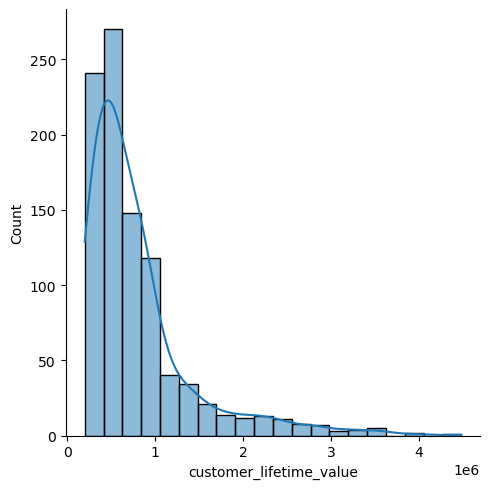

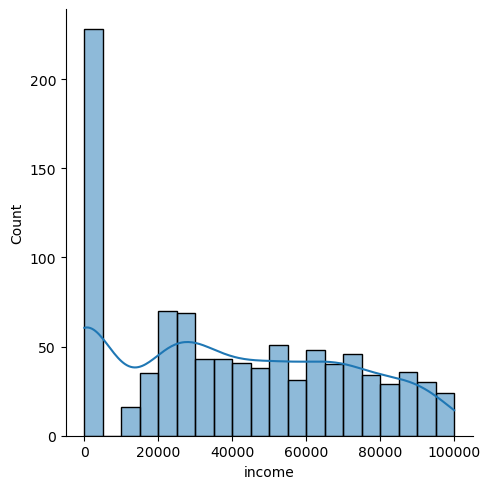

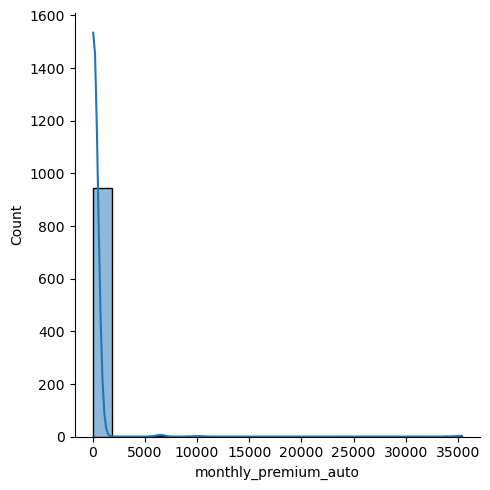

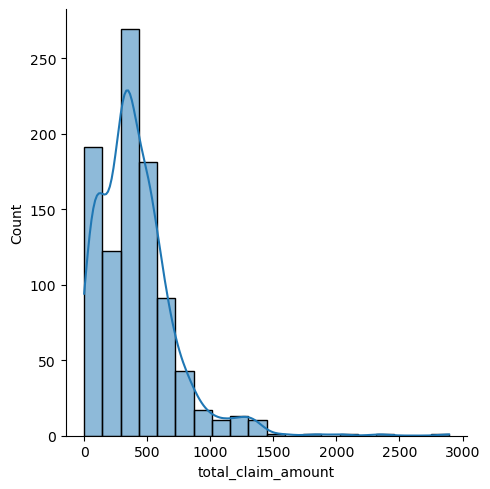

In [172]:
for column in numerical.columns:
    sns.displot(numerical[column], kde=True, bins=20) ##try distplot
    
plt.show    

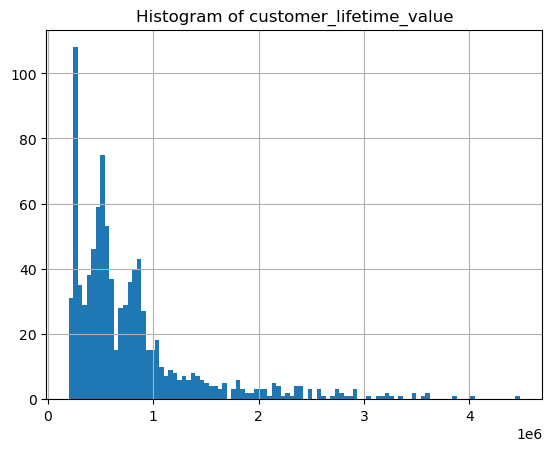

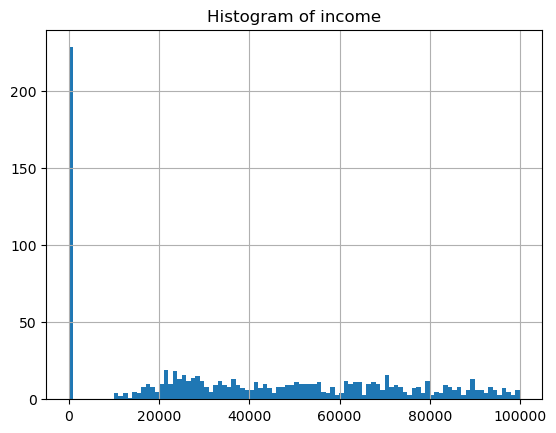

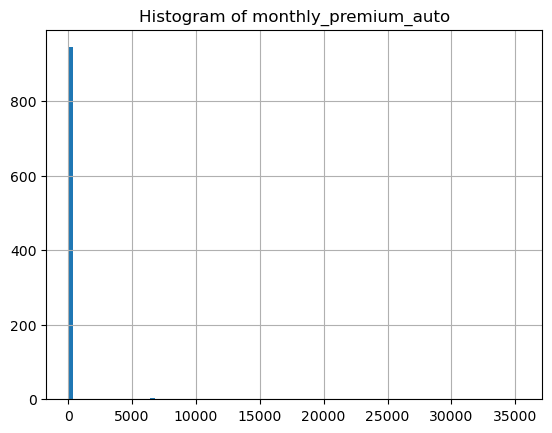

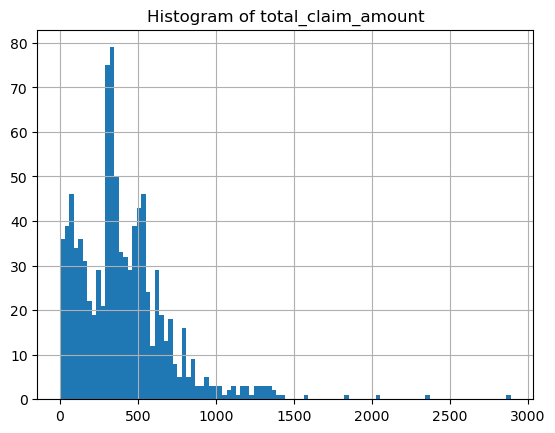

In [173]:
for column in numerical.columns:
    numerical[column].hist(bins=100)
    plt.title(f'Histogram of {column}')
    plt.show()

In [174]:
correlation_matrix = numerical.drop(['total_claim_amount'],axis=1).corr()
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto
customer_lifetime_value,1.000000,0.030614,0.004180
income,0.030614,1.000000,0.051882
monthly_premium_auto,0.004180,0.051882,1.000000


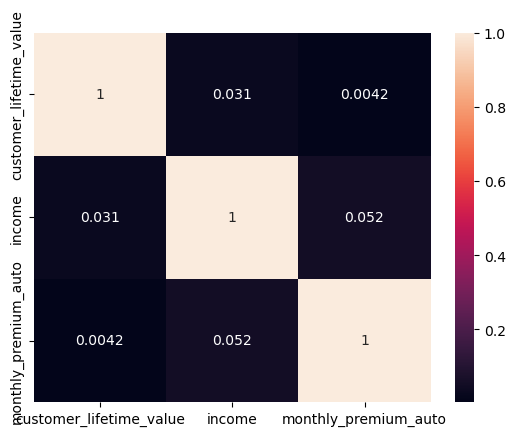

In [175]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Lab | Customer Analysis Round 5

## Get the data

For this lab, we continue using the csv file that that was previously downloaded and the same Jupyter notebook from the previous rounds. There is NO NEED to fork and clone this repository.


## Processing Data

(Further processing...)

- X-y split.
- Scaling (numerical).

In [176]:
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'],axis=1)

In [177]:
X.head()

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,nb_complaints,policy_type,vehicle_class
0,QZ44356,AZ,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car
1,AI49188,NV,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car
2,WW63253,CA,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV
3,GA49547,WA,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car
4,OC83172,OR,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car


In [178]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

In [179]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,952.0,794201.286303,625879.161398,200435.07,411783.58,588574.53,903750.915,4479546.94
income,952.0,39557.350840,30744.561851,0.00,13087.75,36632.00,65085.500,99960.00
monthly_premium_auto,952.0,205.231092,1697.752504,61.00,68.00,83.00,110.000,35354.00


In [180]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(X_num)

X_normalized = MinMaxtransformer.transform(X_num)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns) 

display(X_normalized.head())
print(type(X_normalized))

,customer_lifetime_value,income,monthly_premium_auto
0,0.116267,0.000000,0.000935
1,0.254330,0.487865,0.001332
2,0.131838,0.000000,0.001275
3,0.078491,0.363715,0.000198
4,0.146104,0.629272,0.000227


<class 'pandas.core.frame.DataFrame'>


# Lab | Customer Analysis Round 6


- One Hot/Label Encoding (categorical).
- Concat DataFrames
- Linear Regression
- Train-test split.
- Apply linear regression.
- Model Validation
- Description:
- R2.
- MSE.
- RMSE.
- MAE.

In [181]:
X_cat.describe(include=object).T

,count,unique,top,freq
customer_id,952,952,QZ44356,1
state,952,5,CA,293
gender,952,2,F,501
education,952,5,Bachelor,291
nb_complaints,952,6,0,746
policy_type,952,3,Personal Auto,689
vehicle_class,952,4,Four-Door Car,506


In [182]:
X_cat = X_cat.drop(['customer_id'],axis=1)

In [183]:
X_cat.describe(include=object).T

,count,unique,top,freq
state,952,5,CA,293
gender,952,2,F,501
education,952,5,Bachelor,291
nb_complaints,952,6,0,746
policy_type,952,3,Personal Auto,689
vehicle_class,952,4,Four-Door Car,506


In [192]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder() ##ask if you can still drop the first column? TRY IT AGAIN
encoded = encoder.fit_transform(X_cat).toarray() 
display(list(encoder.get_feature_names_out())) 

# learnt it from https://stackoverflow.com/questions/54570947/feature-names-from-onehotencoder

onehot_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(X_cat.columns))
onehot_encoded

['state_AZ',
 'state_CA',
 'state_NV',
 'state_OR',
 'state_WA',
 'gender_F',
 'gender_M',
 'education_Bachelor',
 'education_College',
 'education_Doctor',
 'education_High School or Below',
 'education_Master',
 'nb_complaints_0',
 'nb_complaints_1',
 'nb_complaints_2',
 'nb_complaints_3',
 'nb_complaints_4',
 'nb_complaints_5',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'vehicle_class_Four-Door Car',
 'vehicle_class_Luxury',
 'vehicle_class_SUV',
 'vehicle_class_Two-Door Car']

,state_AZ,state_CA,state_NV,state_OR,state_WA,gender_F,gender_M,education_Bachelor,education_College,education_Doctor,...,nb_complaints_3,nb_complaints_4,nb_complaints_5,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
948,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
949,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
950,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [193]:
X = pd.concat([X_normalized, onehot_encoded], axis=1)

In [197]:
X.head()

,customer_lifetime_value,income,monthly_premium_auto,state_AZ,state_CA,state_NV,state_OR,state_WA,gender_F,gender_M,...,nb_complaints_3,nb_complaints_4,nb_complaints_5,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.116267,0.000000,0.000935,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.254330,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.131838,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.078491,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.146104,0.629272,0.000227,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [195]:
X.shape

(952, 28)

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [200]:
import math
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [201]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.4122747647206757

In [202]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.3186793113837719

In [203]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

48658.68446705487

In [204]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

220.58713576964288

In [205]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions_test)
mae

161.75211864397903

In [206]:
lm.score(X_test, y_test)

0.3186793113837719

In [207]:
lm.score(X_test, y_test) == r2_score(y_test, predictions_test)

True

# Lab | Customer Analysis Round 7

## Modeling

Description:

Try to improve the linear regression model. Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model.

Some approaches you can try in this exercise:
- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

,state_AZ,state_CA,state_NV,state_OR,state_WA,gender_F,gender_M,education_Bachelor,education_College,education_Doctor,...,nb_complaints_3,nb_complaints_4,nb_complaints_5,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
948,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
949,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
950,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


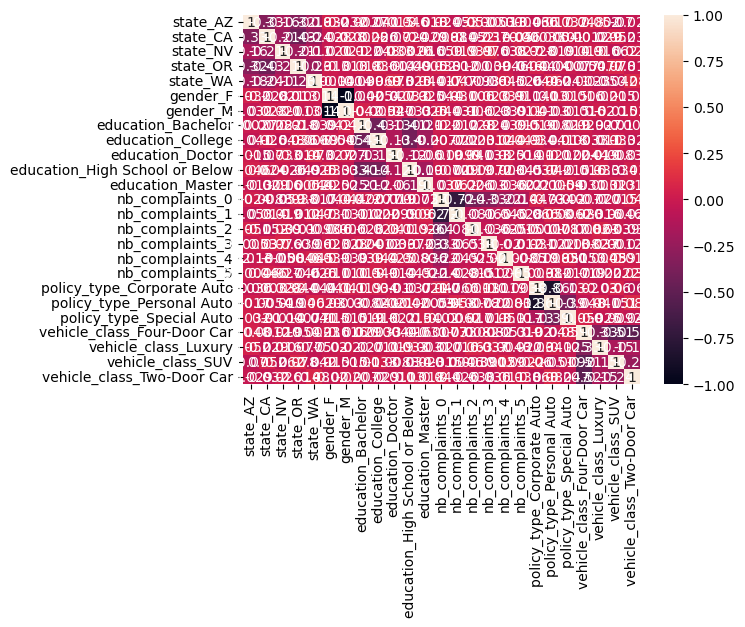